In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [3]:
dataset = pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
X = dataset.drop(['class'],axis=1)
y = dataset['class']

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [17]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(386.3076923076923, 380.52, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(206.03076923076924, 271.8, 'X[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(103.01538461538462, 163.07999999999998, 'X[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(309.04615384615386, 163.07999999999998, 'X[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(360.55384615384617, 54.360000000000014, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(566.5846153846154, 271.8, 'X[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(515.0769230769231, 163.07999999999998, 'X[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue 

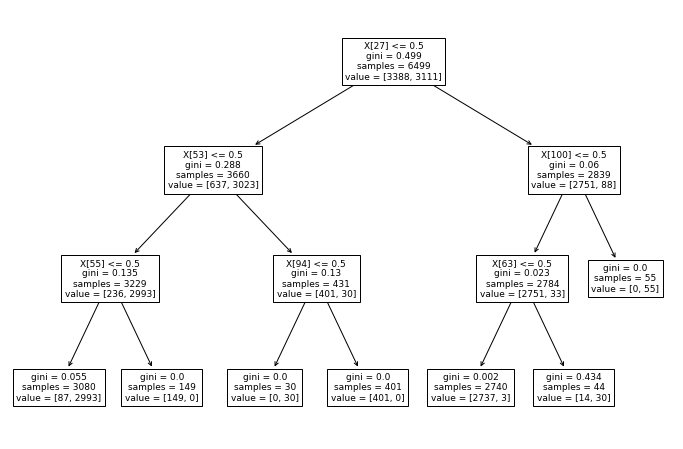

In [18]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [20]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [21]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9902
Training-set accuracy score: 0.9840


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [29]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[766  54]
 [  5 800]]


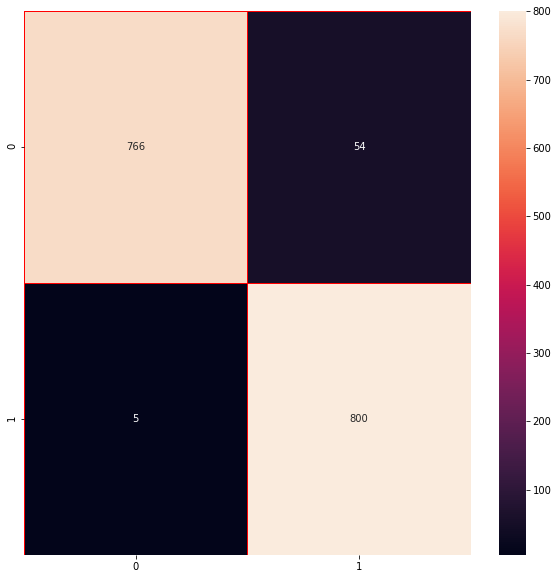

<Figure size 432x288 with 0 Axes>

In [30]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [31]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [32]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9644364074743822
